In [32]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
from tensorflow import keras

train_ds = keras.utils.image_dataset_from_directory(
    directory='train', 
    labels='inferred',
    label_mode='int',   
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='test',
    labels='inferred',
    label_mode='int',  
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [34]:
def process( image, label):
    image = tf.cast( image/255, tf.float32 )
    return image, label

train_ds = train_ds.map( process)
validation_ds = validation_ds.map( process)

In [39]:
model = Sequential()

model.add(
    Conv2D( 
        4,
        kernel_size = (3,3),
        activation = 'relu',
        input_shape = (256,256,3),
        padding = 'valid'
    )
)

model.add(
    BatchNormalization()
)

model.add(
    MaxPooling2D(
        pool_size = (2,2),
        strides = 2,
        padding = 'valid'
    )
)

model.add(
    Conv2D( 
        4,
        kernel_size = (3,3),
        activation = 'relu',
        input_shape = (256,256,3),
        padding = 'valid'
    )
)

model.add(
    BatchNormalization()
)

model.add(
    MaxPooling2D(
        pool_size = (2,2),
        strides = 2,
        padding = 'valid'
    )
)

model.add(
    Conv2D( 
        4,
        kernel_size = (3,3),
        activation = 'relu',
        input_shape = (256,256,3),
        padding = 'valid'
    )
)

model.add(
    BatchNormalization()
)

model.add(
    MaxPooling2D(
        pool_size = (2,2),
        strides = 2,
        padding = 'valid'
    )
)

model.add(
    Flatten()
)

model.add(
    Dense(
        128,
        activation = 'relu'
    )
)

model.add(
    Dropout(0.1)
)

model.add(
    Dense(
        64,
        activation = 'relu'
    )
)

model.add(
    Dropout(0.1)
)

model.add(
    Dense(
        1,
        activation = 'sigmoid'
    )
)

In [40]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 254, 254, 4)    │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 254, 254, 4)    │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 127, 127, 4)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 125, 125, 4)    │           148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 125, 125, 4)    │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 62, 62, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 60, 60, 4)      │           148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 60, 60, 4)      │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 30, 30, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       460,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 469,705 (1.79 MB)

 Trainable params: 469,681 (1.79 MB)

 Non-trainable params: 24 (96.00 B)

In [41]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [42]:
history = model.fit(
    train_ds,
    epochs=2,
    validation_data=validation_ds
)

Epoch 1/2
625/625 ━━━━━━━━━━━━━━━━━━━━ 269s 417ms/step - accuracy: 0.6004 - loss: 0.7333 - val_accuracy: 0.6848 - val_loss: 0.5846
Epoch 2/2
625/625 ━━━━━━━━━━━━━━━━━━━━ 224s 358ms/step - accuracy: 0.7010 - loss: 0.5640 - val_accuracy: 0.7320 - val_loss: 0.5329


In [43]:
import matplotlib.pyplot as plt

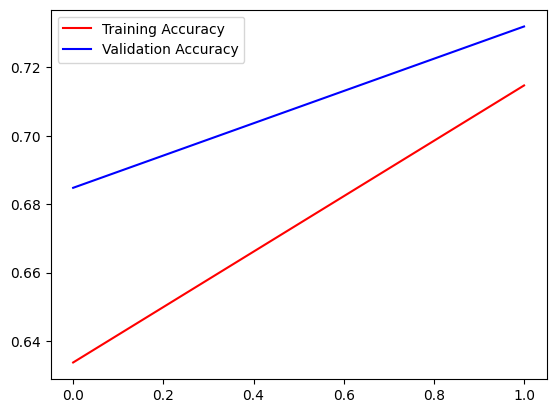

In [44]:
plt.plot(
    history.history['accuracy'],
    color='red',
    label='Training Accuracy'
)

plt.plot(
    history.history['val_accuracy'],
    color='blue',
    label='Validation Accuracy'
)

plt.legend()

plt.show()